<a href="https://colab.research.google.com/github/andricmitrovic/ML-activity/blob/main/perceptron_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import numpy as np
from sklearn import datasets
from tqdm import tqdm
from matplotlib import pyplot as plt

In [186]:
np.random.seed(42)

In [187]:
(data, target) = datasets.load_breast_cancer(return_X_y=True)
data.shape

(569, 30)

In [188]:
N, k = data.shape

In [189]:
data = np.hstack((data, np.ones((N, 1))))       # inserted bias at the end, some error with numpy rounding down floats if i insert np.ones first
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        1.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        1.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        1.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        1.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        1.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [190]:
# converts from {0, 1} to {-1, 1}
target = target * 2 - 1
target

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1

In [191]:
w = np.random.rand(k+1)
w

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485])

In [192]:
ITERATIONS = 100_000    # number of iterations
LR = 0.005           # learning rate

In [193]:
# function for model evaluation
def evalute_model(w):  
  correct_predictions = 0
  for i in range(N):
    x = data[i]
    y = target[i]
    y_pred = np.sign(np.dot(w, x))
    if y == y_pred:
      correct_predictions += 1

  accuracy = correct_predictions / N
  return accuracy

In [194]:
accuracy_history = []

# training loop
for i in tqdm(range(ITERATIONS)):
  idx = np.random.randint(N)
  x = data[idx]
  y = target[idx]
  y_pred = np.sign(np.dot(w, x))
  if y != y_pred:
    w += LR*(y - y_pred)*x
  if i % 500 == 0:
    accuracy_history.append(evalute_model(w))

100%|██████████| 100000/100000 [00:02<00:00, 45917.60it/s]


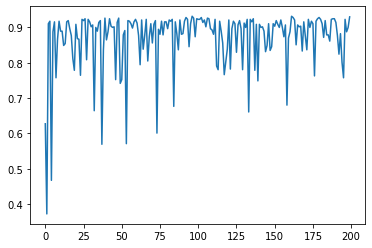

In [195]:
plt.plot(accuracy_history)

In [196]:
accuracy_history[-1]

0.929701230228471